# Epileptic Detection

In [44]:
import pandas as pd
import numpy as np
data = pd.read_csv('Epileptic Seizure Recognition.csv')
print('data size : ',data.shape)
data.head(8) 

data size :  (11500, 180)


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2


##### Checking For Empty Values  

In [45]:
data.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

###### We Do Not Have Missing Data

#### Let's See Our Data Distribution 

In [46]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [47]:
scale = []
for column in data.columns[1:]:  
    column_scale = data[column].max() - data[column].min()
    scale.append(column_scale)

print(scale)

[np.int64(3565), np.int64(3551), np.int64(3532), np.int64(3457), np.int64(3309), np.int64(3573), np.int64(3879), np.int64(3825), np.int64(3887), np.int64(3914), np.int64(3812), np.int64(3850), np.int64(3880), np.int64(3696), np.int64(3501), np.int64(3371), np.int64(3308), np.int64(3208), np.int64(3348), np.int64(3538), np.int64(3786), np.int64(3903), np.int64(3884), np.int64(3745), np.int64(3529), np.int64(3301), np.int64(3121), np.int64(3117), np.int64(3270), np.int64(3418), np.int64(3189), np.int64(2898), np.int64(2811), np.int64(2933), np.int64(3228), np.int64(3034), np.int64(3133), np.int64(3195), np.int64(3138), np.int64(3191), np.int64(3125), np.int64(3174), np.int64(3107), np.int64(3392), np.int64(3258), np.int64(3341), np.int64(3696), np.int64(3916), np.int64(3932), np.int64(3918), np.int64(3914), np.int64(3895), np.int64(3889), np.int64(3678), np.int64(3550), np.int64(3536), np.int64(3459), np.int64(3734), np.int64(3910), np.int64(3908), np.int64(3915), np.int64(3907), np.int6

##### The data shows significant variation, as indicated by the large scale values across the columns. 
#### So, We Need Data Normalization 

In [48]:
from sklearn.preprocessing import MinMaxScaler
data = data.drop(columns=['Unnamed'])
X = data.iloc[:, :-1]  
y = data['y']          
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
normalized_data = pd.DataFrame(X_normalized, columns=data.columns[:-1])
normalized_data['y'] = y.values

#### Our Data Is Normalized Now

Column names in the DataFrame: Index(['feature1', 'feature2', 'y'], dtype='object')


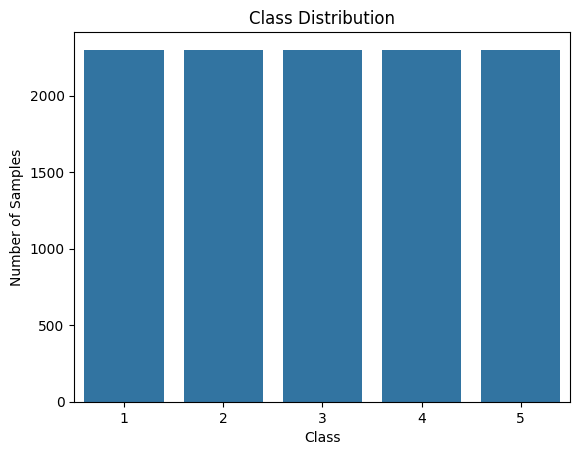

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

column_names = ['feature1', 'feature2', 'y']  
df = pd.DataFrame(normalized_data, columns=column_names)

print("Column names in the DataFrame:", df.columns)
if 'y' in df.columns:
    class_distribution = df['y'].value_counts()
    sns.barplot(x=class_distribution.index, y=class_distribution.values)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.show()
    print(class_distribution)
else:
    print("Column 'y' does not exist in the DataFrame.")


#### It Says That Our Data Is Balanced Now!